In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import csv
# from api_key import api_key
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
export_url = (f"https://api.census.gov/data/timeseries/intltrade/exports")
import_url = (f"https://api.census.gov/data/timeseries/intltrade/imports")
china_code = "5700"
usa_code = "1000"
month = []
year = []


In [3]:
export_by_commodity = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2015-01&COMM_LVL=HS2&CTY_CODE={china_code}").json()


In [5]:
len(export_by_commodity)

4746

In [4]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4745:
    count += 1
    movalue.append(export_by_commodity[count][2])
    yrvalue.append(export_by_commodity[count][3])
    desc.append(export_by_commodity[count][1])
    period.append(export_by_commodity[count][4])
    code.append(export_by_commodity[count][0])
china_data_export = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value" : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

In [5]:
import_by_commodity = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_MO,GEN_VAL_YR&time=from+2015-01&COMM_LVL=HS2&CTY_CODE={china_code}").json()


4803

In [6]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    movalue.append(import_by_commodity[count][2])
    yrvalue.append(import_by_commodity[count][3])
    desc.append(import_by_commodity[count][1])
    period.append(import_by_commodity[count][4])
    code.append(import_by_commodity[count][0])
china_data_import = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value" : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

In [7]:
china_data_export["YTD Value"] =pd.to_numeric(china_data_export["YTD Value"])
china_data_import["YTD Value"] =pd.to_numeric(china_data_import["YTD Value"])
china_data_import["Monthly Value"] =pd.to_numeric(china_data_import["Monthly Value"])
china_data_export["Monthly Value"] =pd.to_numeric(china_data_export["Monthly Value"])

In [12]:
china_exp = china_data_export.to_csv("china_exp.csv", index=False)
china_imp = china_data_import.to_csv("china_imp.csv", index=False)

In [8]:
china_data_import

,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,1395030,611000,2015-02,LIVE ANIMALS,01
1,4249990,2854960,2015-03,LIVE ANIMALS,01
2,8561570,4311580,2015-04,LIVE ANIMALS,01
3,9446570,885000,2015-05,LIVE ANIMALS,01
4,13469407,4022837,2015-06,LIVE ANIMALS,01
5,14980503,1511096,2015-07,LIVE ANIMALS,01
6,18290205,3309702,2015-08,LIVE ANIMALS,01
7,21325543,3035338,2015-09,LIVE ANIMALS,01
8,25069663,3744120,2015-10,LIVE ANIMALS,01
9,26831863,1762200,2015-11,LIVE ANIMALS,01


In [28]:
china_data_import.groupby(["Comm Code","Commodity","Period"])["YTD Value"].max()

Comm Code  Commodity                         Period 
01         LIVE ANIMALS                      2015-02       1395030
                                             2015-03       4249990
                                             2015-04       8561570
                                             2015-05       9446570
                                             2015-06      13469407
                                             2015-07      14980503
                                             2015-08      18290205
                                             2015-09      21325543
                                             2015-10      25069663
                                             2015-11      26831863
                                             2015-12      27704684
                                             2016-01       3449640
                                             2016-02       6820440
                                             2016-03      10966765
         

In [9]:
def yearly_data(trade,year):
    data = trade[trade["Period"].str.contains(year)]
    data = data.groupby(["Comm Code","Commodity"])["YTD Value"].max()
    data = pd.DataFrame({"total" : data})
#     data = data.nlargest(10,"total")
    data = data.reset_index()
    
    return data
    
    

In [12]:
# first_2015 = china_data_export[china_data_export["Period"].str.contains("2015")]

In [14]:
# data_2015 = first_2015.groupby(["Comm Code","Commodity"])["YTD Value"].sum()
china_data_export["YTD Value"].sum()

3041011721625

In [15]:
# test= pd.DataFrame({"total" : data_2015})
china_data_export["Commodity"].nunique()

97

In [10]:
df = china_data_import.groupby(["Period"])["Monthly Value"].sum()
pd.DataFrame(df)

,Monthly Value
Period,
2015-01,38588912701
2015-02,31563988155
2015-03,41136917530
2015-04,36121394467
2015-05,39082029905
2015-06,41453839795
2015-07,41215078176
2015-08,44138055272
2015-09,45724951242


In [11]:
df = df.reset_index()

In [12]:
df.head()

,Period,Monthly Value
0,2015-01,38588912701
1,2015-02,31563988155
2,2015-03,41136917530
3,2015-04,36121394467
4,2015-05,39082029905


In [94]:
type(df.Period)


pandas.core.series.Series

In [13]:
df["date"] = pd.to_datetime(df.Period)

In [14]:
df.head()

,Period,Monthly Value,date
0,2015-01,38588912701,2015-01-01
1,2015-02,31563988155,2015-02-01
2,2015-03,41136917530,2015-03-01
3,2015-04,36121394467,2015-04-01
4,2015-05,39082029905,2015-05-01


In [15]:
sales = df[["date","Monthly Value"]]

In [16]:
sales = sales.set_index('date')

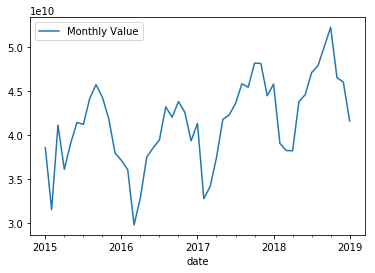

In [17]:
sales.plot()

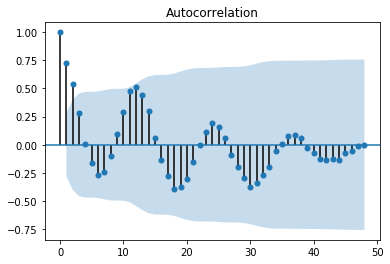

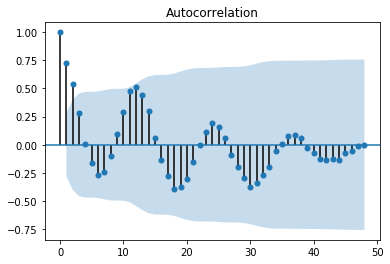

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [19]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [20]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Monthly Value
date,
2015-02-01,-7.024925e+09
2015-03-01,9.572929e+09
2015-04-01,-5.015523e+09
2015-05-01,2.960635e+09
2015-06-01,2.371810e+09


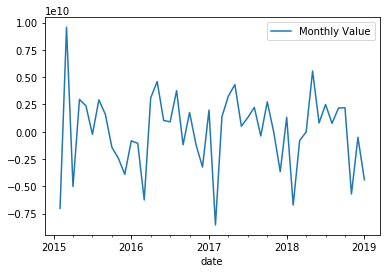

In [21]:
sales_diff.plot()

In [22]:
len(sales["Monthly Value"])

49

In [58]:
X = sales.values
train = X[0:39] # 27 data as train data
test = X[38:]  # 9 data as test data
predictions = []

In [32]:
test.size

10

In [25]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [62]:
predictions = model_ar_fit.predict(start=39,end=49)

In [60]:
test

array([[38256735066],
       [38230010004],
       [43797369781],
       [44599462713],
       [47096007634],
       [47863906454],
       [50032120606],
       [52232992043],
       [46525682470],
       [46013498775],
       [41603830547]], dtype=int64)

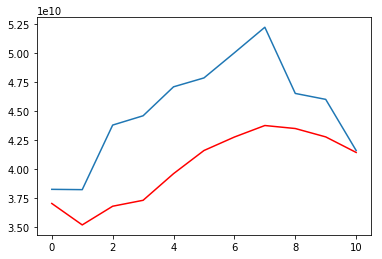

In [63]:
plt.plot(test)
plt.plot(predictions,color='red')

In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [103]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 1, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1785.7882935243447


In [106]:
predictions= model_arima_fit.forecast(steps=11)[0]
predictions

array([3.87680408e+10, 3.73660281e+10, 3.98410730e+10, 4.08405015e+10,
       4.29062510e+10, 4.55296432e+10, 4.55704278e+10, 4.65454018e+10,
       4.51081084e+10, 4.35129190e+10, 4.23655426e+10])

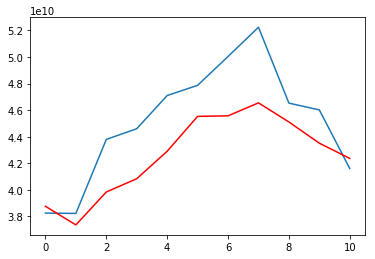

In [107]:
plt.plot(test)
plt.plot(predictions,color='red')

In [17]:
data_2015_import = yearly_data(china_data_import,"2015")
data_2015_export = yearly_data(china_data_export,"2015")

data_2016_import = yearly_data(china_data_import,"2016")
data_2016_export = yearly_data(china_data_export,"2016")

data_2017_import = yearly_data(china_data_import,"2017")
data_2017_export = yearly_data(china_data_export,"2017")

data_2018_import = yearly_data(china_data_import,"2018")
data_2018_export = yearly_data(china_data_export,"2018")


In [25]:
data_2015_import

,Comm Code,Commodity,total
0,01,LIVE ANIMALS,27704684
1,02,MEAT AND EDIBLE MEAT OFFAL,21002893
2,03,"FISH, CRUSTACEANS & AQUATIC INVERTEBRATES",1902035239
3,04,DAIRY PRODS; BIRDS EGGS; HONEY; ED ANIMAL PR N...,13018046
4,05,"PRODUCTS OF ANIMAL ORIGIN, NESOI",423687205
5,06,"LIVE TREES, PLANTS, BULBS ETC.; CUT FLOWERS ETC.",40573435
6,07,EDIBLE VEGETABLES & CERTAIN ROOTS & TUBERS,417480390
7,08,EDIBLE FRUIT & NUTS; CITRUS FRUIT OR MELON PEEL,182257502
8,09,"COFFEE, TEA, MATE & SPICES",279248260
9,10,CEREALS,10423112


In [19]:
change_15_to_16 = (data_2016_export["total"]-data_2015_export["total"])/data_2015_export["total"]
change_16_to_17 = (data_2017_export["total"]-data_2016_export["total"])/data_2016_export["total"]
change_17_to_18 = (data_2018_export["total"]-data_2017_export["total"])/data_2017_export["total"]
# pd.set_option('display.long_format', lamba d: '')
df = pd.DataFrame({"code" : data_2015_export["Comm Code"],
                           "commodity" :data_2015_export["Commodity"] ,
                           "total 2015" : data_2015_export["total"],
                           "Change 15 to 16" : change_15_to_16,
                           "total 2016" : data_2016_export["total"],
                           "Change 16 to 17": change_16_to_17,
                           "total 2017": data_2017_export["total"],
                            "Change 17 to 18": change_17_to_18,
                            "total 2018": data_2018_export["total"]
                          })
df
# test_df_export = df[df["total 2018"] > 1000000000]

,code,commodity,total 2015,Change 15 to 16,total 2016,Change 16 to 17,total 2017,Change 17 to 18,total 2018
0,01,LIVE ANIMALS,10244385,-0.375314,6399523,1.614141,16729257,-0.123199,14668230
1,02,MEAT AND EDIBLE MEAT OFFAL,335616368,0.741901,584610550,-0.107270,521899634,-0.249511,391679816
2,03,"FISH, CRUSTACEANS & AQUATIC INVERTEBRATES",1007942885,-0.058282,949197817,0.301720,1235589412,-0.138138,1064907299
3,04,DAIRY PRODS; BIRDS EGGS; HONEY; ED ANIMAL PR N...,293604977,-0.093284,266216245,0.536488,409038171,-0.227635,315926940
4,05,"PRODUCTS OF ANIMAL ORIGIN, NESOI",266200493,-0.045513,254085015,0.060236,269390023,0.179814,317830044
5,06,"LIVE TREES, PLANTS, BULBS ETC.; CUT FLOWERS ETC.",7269741,-0.247339,5471654,-0.181904,4476338,0.022868,4578705
6,07,EDIBLE VEGETABLES & CERTAIN ROOTS & TUBERS,49126621,-0.183282,40122600,0.185720,47574169,-0.288887,33830616
7,08,EDIBLE FRUIT & NUTS; CITRUS FRUIT OR MELON PEEL,350212968,0.084048,379647558,0.286638,488468993,-0.075322,451676290
8,09,"COFFEE, TEA, MATE & SPICES",13702701,0.270346,17407167,0.275173,22197144,0.329267,29505935
9,10,CEREALS,2466361238,-0.475434,1293769326,0.042660,1348961712,-0.482542,698031515


In [164]:
# test_df_export.round(2)


In [20]:
df["total 2018"].sum()

120341425641

In [21]:
# data_2015= test.nlargest(10,"total")
# data_2015_import = data_2015_import.to_csv("data_2015_import.csv", index=False)
# data_2015_export = data_2015_export.to_csv("data_2015_export.csv", index=False)

# data_2016_import = data_2016_import.to_csv("data_2016_import.csv", index=False)
# data_2016_export = data_2016_export.to_csv("data_2016_export.csv", index=False)

# data_2017_import = data_2017_import.to_csv("data_2017_import.csv", index=False)
# data_2017_export = data_2017_export.to_csv("data_2017_export.csv", index=False)

# data_2018_import = data_2018_import.to_csv("data_2018_import.csv", index=False)
# data_2018_export = data_2018_export.to_csv("data_2018_export.csv", index=False)

In [21]:
total_import_export =  pd.DataFrame({"year":["2015","2016","2017","2018"],
                                     "import":[data_2015_import["total"].sum(),data_2016_import["total"].sum(),data_2017_import["total"].sum(),data_2018_import["total"].sum()],
                                     "export":[data_2015_export["total"].sum(),data_2016_export["total"].sum(),data_2017_export["total"].sum(),data_2018_export["total"].sum()]
                                     
})
total_import_export

,year,import,export
0,2015,483201655364,115873365314
1,2016,462542004554,115545507660
2,2017,505469954379,129893586716
3,2018,539503427742,120341425641


In [22]:
total_import_export["deficit"]= total_import_export["import"]-total_import_export["export"]

In [23]:
total_import_export

,year,import,export,deficit
0,2015,483201655364,115873365314,367328290050
1,2016,462542004554,115545507660,346996496894
2,2017,505469954379,129893586716,375576367663
3,2018,539503427742,120341425641,419162002101


In [23]:
# data_2015 = data_2015.to_csv("data_2015.csv", index=False)

In [168]:
monthly_import_export = pd.DataFrame({"month":["jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
                                     "2017 export":monthly_2017_export["total"],
                                     "2017 import":monthly_2017_import["total"],
                                     "2018 export":monthly_2018_export["total"],
                                     "2018 import":monthly_2018_import["total"]
                                      })
monthly_import_export

,month,2017 export,2017 import,2018 export,2018 import
0,jan,9961097157,41343083151,9835259350,45788040550
1,Feb,9735785625,32804295619,9806092670,39067601646
2,Mar,9719186451,34186942135,12382086329,38256735066
3,Apr,9805657653,37465635527,10268035458,38230010004
4,May,9862177185,41783058622,10610817545,43797369781
5,Jun,9717402236,42289152147,11115623430,44599462713
6,Jul,9979057962,43589168843,10261688039,47096007634
7,Aug,10828339314,45817767860,9294344300,47863906454
8,Sep,10911677353,45429719676,9789081065,50032120606
9,Oct,12963434465,48167652565,9130520323,52232992043


In [134]:
def monthly_data(trade,year):
    month = trade[trade["Period"].str.contains(year)]
    month = month.groupby(["Period"])["Monthly Value"].sum()
    month = pd.DataFrame({"total" : month})
#     data = data.nlargest(10,"total")
    month = month.reset_index()
    
    return month

In [135]:
monthly_2015_export = monthly_data(china_data_export,"2015")
monthly_2015_import = monthly_data(china_data_import,"2015")

monthly_2016_import = monthly_data(china_data_import,"2016")
monthly_2016_export = monthly_data(china_data_export,"2016")

monthly_2017_import = monthly_data(china_data_import,"2017")
monthly_2017_export = monthly_data(china_data_export,"2017")

monthly_2018_import = monthly_data(china_data_import,"2018")
monthly_2018_export = monthly_data(china_data_export,"2018")

In [170]:
tj=monthly_import_export.to_json(orient='records')

In [171]:
pprint(tj)

('[{"month":"jan","2017 export":9961097157,"2017 import":41343083151,"2018 '
 'export":9835259350,"2018 import":45788040550},{"month":"Feb","2017 '
 'export":9735785625,"2017 import":32804295619,"2018 export":9806092670,"2018 '
 'import":39067601646},{"month":"Mar","2017 export":9719186451,"2017 '
 'import":34186942135,"2018 export":12382086329,"2018 '
 'import":38256735066},{"month":"Apr","2017 export":9805657653,"2017 '
 'import":37465635527,"2018 export":10268035458,"2018 '
 'import":38230010004},{"month":"May","2017 export":9862177185,"2017 '
 'import":41783058622,"2018 export":10610817545,"2018 '
 'import":43797369781},{"month":"Jun","2017 export":9717402236,"2017 '
 'import":42289152147,"2018 export":11115623430,"2018 '
 'import":44599462713},{"month":"Jul","2017 export":9979057962,"2017 '
 'import":43589168843,"2018 export":10261688039,"2018 '
 'import":47096007634},{"month":"Aug","2017 export":10828339314,"2017 '
 'import":45817767860,"2018 export":9294344300,"2018 '
 'import":

In [172]:
monthly_import_export_csv = monthly_import_export.to_csv("monthly_import_export.csv", index=False)

In [154]:
engine = create_engine('sqlite:///../data/china_trade.sqlite')

In [155]:
Base = automap_base()
Base.prepare(engine, reflect=True)
session = Session(engine)


In [156]:
Base.classes.keys()

['export', 'hs2export', 'hs2import', 'imports', 'yrhs2export', 'yrhs2import']

In [157]:
Monthly = Base.classes.export


In [166]:
Export = session.query(Monthly)
Export.__dict__


{'session': <sqlalchemy.orm.session.Session at 0x118300263c8>,
 '_polymorphic_adapters': {},
 '_entities': [<sqlalchemy.orm.query._MapperEntity at 0x1183296f048>],
 '_primary_entity': <sqlalchemy.orm.query._MapperEntity at 0x1183296f048>,
 '_has_mapper_entities': True,
 '_mapper_adapter_map': {sqlalchemy.ext.automap.export: (<Mapper at 0x11830026128; export>,
   None)}}

In [161]:
monthly_import_export= monthly_import_export.to_dict("records")

In [167]:
results = session.query(Export)

AttributeError: 'Query' object has no attribute 'is_clause_element'

In [41]:
Us_total_export = china_data_export.to_csv("US_total_export.csv", index=False)

In [67]:
US_total_import = china_data_import.to_csv("US_total_impor.csv", index=False)